## Problem Definition


Fuel spamming and fuel adulteration can cause abnormal mileage drops in vehicles.
The objective of this project is to detect fuel spamming behavior using vehicle
fuel and mileage data by applying machine learning classification techniques.


Expected Output:
- Predict whether fuel spamming has occurred (Yes/No)
- Evaluate model performance using accuracy, precision, recall, and F1-score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv('/content/vehicle_fuel_spam_dataset1 (1).csv')
df

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
0,VH109722,Diesel,29.66,488.00,16.45,14.75,-3.31,11.44,11.80,Yes,1
1,VH100269,CNG,25.78,98.32,3.81,2.48,-3.33,-0.85,1.98,Yes,1
2,VH109762,Diesel,3.36,294.89,87.76,89.04,-4.50,84.54,71.23,No,0
3,VH100810,CNG,14.99,131.19,8.75,10.51,-1.14,9.37,8.41,No,0
4,VH104618,CNG,58.34,801.05,13.73,13.34,-9.27,4.07,10.67,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
11689,VH102421,CNG,55.83,195.12,3.49,2.43,-2.51,-0.08,1.94,Yes,1
11690,VH108892,CNG,24.79,675.19,27.24,27.88,-3.20,24.68,22.30,No,0
11691,VH109225,Diesel,44.08,180.64,4.10,3.42,-0.46,2.96,2.74,No,0
11692,VH101454,Petrol,72.72,93.30,1.28,1.46,0.91,2.37,1.17,No,0


## Dataset Description

Source:
Vehicle fuel behavior dataset (standard vehicle monitoring datasets and OBD-II parameters)

Dataset Size:
(Number of rows : 10000) × (Number of columns : 11)

Main Features:
- vehicle_id: Unique identifier for vehicles
- fuel_type: Type of fuel used
- average_mileage: Normal mileage of the vehicle
- current_mileage: Recent mileage
- deviation: Difference between expected and actual mileage
- mileage_drop: Indicates abnormal drop in mileage
- fuel_spam_detection_label: Target variable (0 = No Spam, 1 = Spam)

The dataset was checked for missing values, duplicates, and outliers.

In [ ]:
df.head()

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
0,VH109722,Diesel,29.66,488.00,16.45,14.75,-3.31,11.44,11.80,Yes,1
1,VH100269,CNG,25.78,98.32,3.81,2.48,-3.33,-0.85,1.98,Yes,1
2,VH109762,Diesel,3.36,294.89,87.76,89.04,-4.50,84.54,71.23,No,0
3,VH100810,CNG,14.99,131.19,8.75,10.51,-1.14,9.37,8.41,No,0
4,VH104618,CNG,58.34,801.05,13.73,13.34,-9.27,4.07,10.67,Yes,1


In [ ]:
df.tail()

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
11689,VH102421,CNG,55.83,195.12,3.49,2.43,-2.51,-0.08,1.94,Yes,1
11690,VH108892,CNG,24.79,675.19,27.24,27.88,-3.20,24.68,22.30,No,0
11691,VH109225,Diesel,44.08,180.64,4.10,3.42,-0.46,2.96,2.74,No,0
11692,VH101454,Petrol,72.72,93.30,1.28,1.46,0.91,2.37,1.17,No,0
11693,VH104772,Diesel,15.70,43.94,2.80,2.91,-4.98,-2.07,2.33,Yes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vehicle_id                 11694 non-null  object 
 1   fuel_type                  11694 non-null  object 
 2   fuel_consumed              11694 non-null  float64
 3   distance_travelled         11694 non-null  float64
 4   mileage                    11694 non-null  float64
 5   average_mileage            11694 non-null  float64
 6   deviation                  11694 non-null  float64
 7   current_mileage            11694 non-null  float64
 8   threshold                  11694 non-null  float64
 9   mileage_drop               11694 non-null  object 
 10  fuel_spam_detection_label  11694 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 1005.1+ KB


In [ ]:
df.describe(include='all')

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
count,11694,11694,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694,11694.000000
unique,7439,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,VH106656,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,11,3966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5847,NaN
mean,NaN,NaN,44.457067,467.421933,18.793801,19.177157,-1.484569,17.692588,15.341754,NaN,0.500000
std,NaN,NaN,21.971566,284.396264,32.623634,32.551338,3.780561,33.046016,26.041143,NaN,0.500021
min,NaN,NaN,2.010000,20.050000,0.270000,-5.070000,-13.040000,-9.330000,-4.060000,NaN,0.000000
25%,NaN,NaN,26.302500,219.220000,5.050000,5.542500,-4.070000,3.660000,4.432500,NaN,0.000000
50%,NaN,NaN,45.470000,446.750000,10.170000,10.760000,-1.860000,8.780000,8.610000,NaN,0.500000
75%,NaN,NaN,64.120000,710.690000,17.960000,18.540000,1.000000,17.560000,14.830000,NaN,1.000000


## Data Preprocessing

Steps performed:
1. Removed missing values
2. Checked and removed duplicates
3. Removed outliers using IQR method
4. Encoded categorical variables using Label Encoding
5. Normalized numerical features using Min-Max Scaling
6. Split data into training and testing sets (80:20)

These steps ensure the dataset is clean and suitable for machine learning.

In [ ]:
df['fuel_spam_detection_label'].unique()

array([1, 0])

In [ ]:
# get number of samples per class
df['fuel_spam_detection_label'].value_counts()

,count
fuel_spam_detection_label,
1,5847
0,5847


In [ ]:
# Task 1: Check null values
df.isnull().sum()

,0
vehicle_id,0
fuel_type,0
fuel_consumed,0
distance_travelled,0
mileage,0
average_mileage,0
deviation,0
current_mileage,0
threshold,0
mileage_drop,0


In [ ]:
df.dropna(inplace=True)
df

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
0,VH109722,Diesel,29.66,488.00,16.45,14.75,-3.31,11.44,11.80,Yes,1
1,VH100269,CNG,25.78,98.32,3.81,2.48,-3.33,-0.85,1.98,Yes,1
2,VH109762,Diesel,3.36,294.89,87.76,89.04,-4.50,84.54,71.23,No,0
3,VH100810,CNG,14.99,131.19,8.75,10.51,-1.14,9.37,8.41,No,0
4,VH104618,CNG,58.34,801.05,13.73,13.34,-9.27,4.07,10.67,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
11689,VH102421,CNG,55.83,195.12,3.49,2.43,-2.51,-0.08,1.94,Yes,1
11690,VH108892,CNG,24.79,675.19,27.24,27.88,-3.20,24.68,22.30,No,0
11691,VH109225,Diesel,44.08,180.64,4.10,3.42,-0.46,2.96,2.74,No,0
11692,VH101454,Petrol,72.72,93.30,1.28,1.46,0.91,2.37,1.17,No,0


In [ ]:
# Check for Duplicates
df.duplicated().sum()

np.int64(4255)

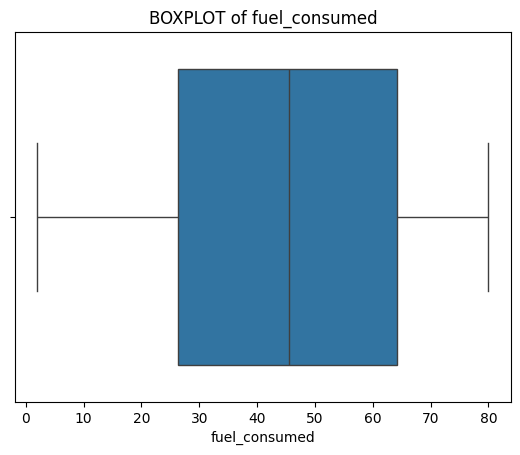

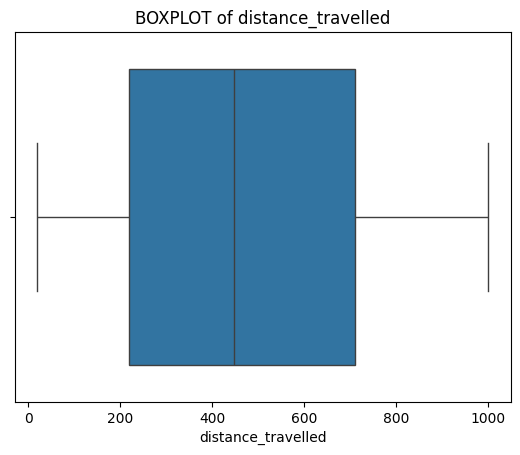

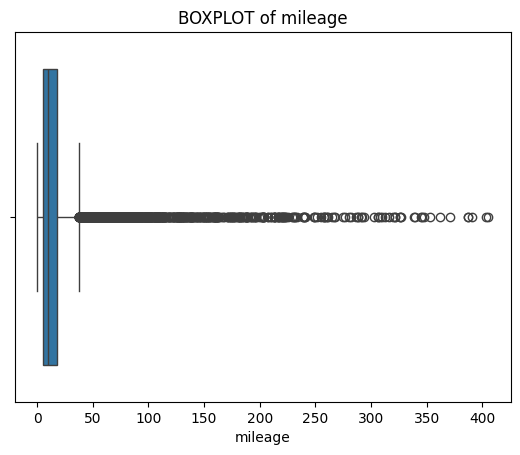

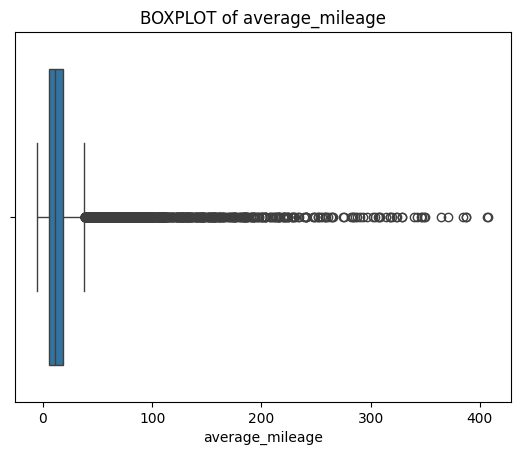

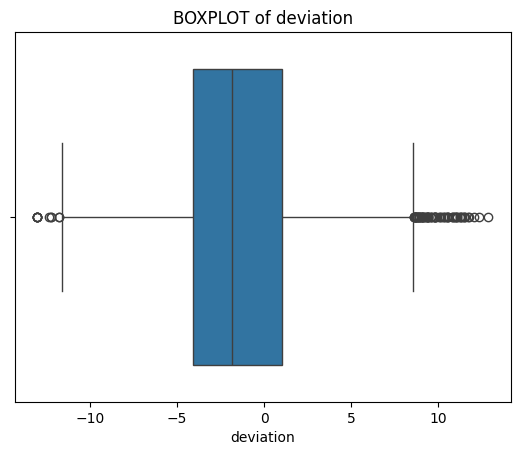

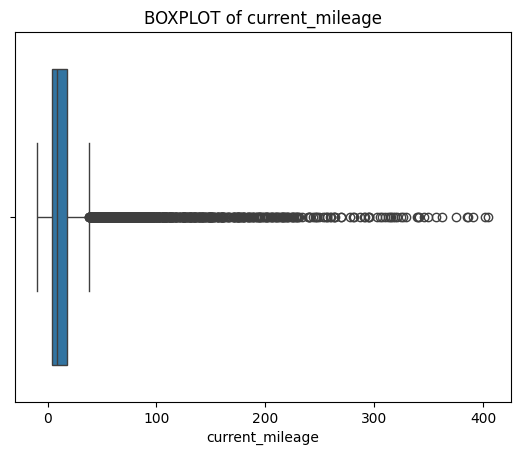

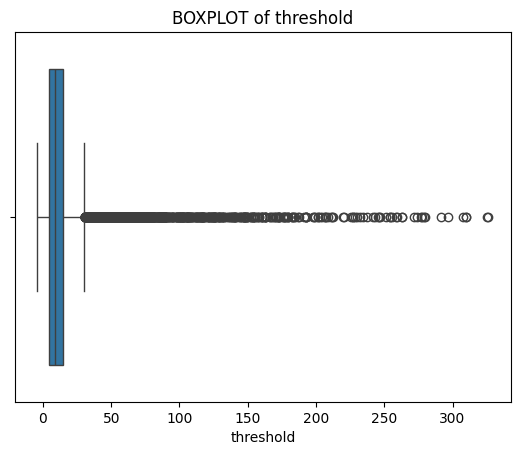

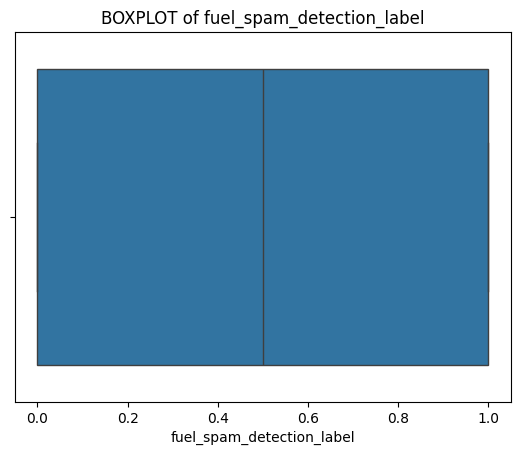

In [ ]:
#Check for Outliers - Numerical Only
#Numberiical: fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,fuel_spam_detection_label
numerical_features= ['fuel_consumed','distance_travelled','mileage','average_mileage','deviation','current_mileage','threshold','fuel_spam_detection_label']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'BOXPLOT of {feature}')
    plt.show()

In [ ]:
# Decision :Remove Outliers from all numerical features
#Numberiical: fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,fuel_spam_detection_label
for feature in numerical_features:
    q1,q3=np.percentile(df[feature],[25,75])
    iqr=q3-q1
    Minimum=q1-1.5*iqr
    Maximum=q3+1.5*iqr
    df=df[(df[feature]>=Minimum) & (df[feature]<=Maximum)]
    print(f'outliers removed from {feature}')

outliers removed from fuel_consumed
outliers removed from distance_travelled
outliers removed from mileage
outliers removed from average_mileage
outliers removed from deviation
outliers removed from current_mileage
outliers removed from threshold
outliers removed from fuel_spam_detection_label


In [ ]:
#Label Encode Categorical Features
# Categorical: vehicle_id,fuel_type,mileage_drop
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['vehicle_id'] = le.fit_transform(df['vehicle_id'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['mileage_drop'] = le.fit_transform(df['mileage_drop'])

In [ ]:
df

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
0,5504,1,29.66,488.00,16.45,14.75,-3.31,11.44,11.80,1,1
1,156,0,25.78,98.32,3.81,2.48,-3.33,-0.85,1.98,1,1
3,455,0,14.99,131.19,8.75,10.51,-1.14,9.37,8.41,0,0
4,2607,0,58.34,801.05,13.73,13.34,-9.27,4.07,10.67,1,1
5,3156,2,71.86,386.98,5.39,7.69,-2.60,5.09,6.15,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11689,1406,0,55.83,195.12,3.49,2.43,-2.51,-0.08,1.94,1,1
11690,5007,0,24.79,675.19,27.24,27.88,-3.20,24.68,22.30,0,0
11691,5198,1,44.08,180.64,4.10,3.42,-0.46,2.96,2.74,0,0
11692,846,2,72.72,93.30,1.28,1.46,0.91,2.37,1.17,0,0


In [ ]:
df.corr()

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
vehicle_id,1.000000,-0.010552,0.008995,-0.014377,-0.018526,-0.019725,-0.009548,-0.023247,-0.019732,0.024807,0.024807
fuel_type,-0.010552,1.000000,0.001227,-0.005833,-0.002282,0.002618,0.020463,0.012844,0.002612,-0.004579,-0.004579
fuel_consumed,0.008995,0.001227,1.000000,0.245826,-0.377463,-0.354617,-0.018137,-0.339882,-0.354626,0.119743,0.119743
distance_travelled,-0.014377,-0.005833,0.245826,1.000000,0.724446,0.701085,0.006796,0.657179,0.701076,-0.235838,-0.235838
mileage,-0.018526,-0.002282,-0.377463,0.724446,1.000000,0.953768,0.028614,0.903884,0.953767,-0.317744,-0.317744
average_mileage,-0.019725,0.002618,-0.354617,0.701085,0.953768,1.000000,-0.134912,0.863860,1.000000,-0.195931,-0.195931
deviation,-0.009548,0.020463,-0.018137,0.006796,0.028614,-0.134912,1.000000,0.382581,-0.134904,-0.756227,-0.756227
current_mileage,-0.023247,0.012844,-0.339882,0.657179,0.903884,0.863860,0.382581,1.000000,0.863864,-0.567145,-0.567145
threshold,-0.019732,0.002612,-0.354626,0.701076,0.953767,1.000000,-0.134904,0.863864,1.000000,-0.195945,-0.195945
mileage_drop,0.024807,-0.004579,0.119743,-0.235838,-0.317744,-0.195931,-0.756227,-0.567145,-0.195945,1.000000,1.000000


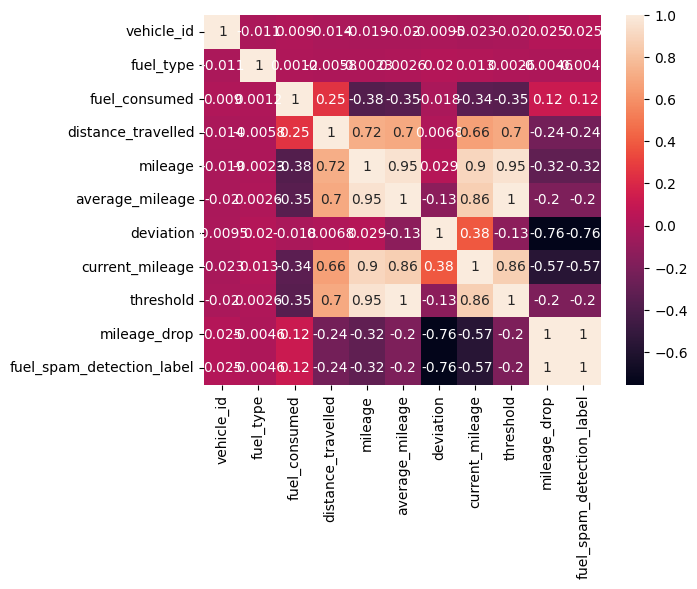

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#Feature Scaling- Numerical Only - MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# df['vehicle_id','fuel_type','fuel_consumed','distance_travelled','mileage','average_mileage','deviation','current_mileage','threshold','mileage_drop	','fuel_spam_detection_label'])
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df


,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
0,5504,1,0.346539,0.477558,0.524984,0.589705,0.415345,0.549762,0.589810,1,1.0
1,156,0,0.296142,0.079877,0.114860,0.224636,0.414322,0.224457,0.224619,1,1.0
3,455,0,0.155994,0.113422,0.275146,0.463553,0.526343,0.494971,0.463741,0,0.0
4,2607,0,0.719054,0.797036,0.436729,0.547754,0.110486,0.354685,0.547787,1,1.0
5,3156,2,0.894662,0.374464,0.166126,0.379649,0.451662,0.381683,0.379695,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11689,1406,0,0.686453,0.178665,0.104478,0.223148,0.456266,0.244839,0.223131,1,1.0
11690,5007,0,0.283284,0.668592,0.875081,0.980363,0.420972,0.900212,0.980290,0,0.0
11691,5198,1,0.533836,0.163887,0.124270,0.252603,0.561125,0.325304,0.252882,0,0.0
11692,846,2,0.905832,0.074754,0.032771,0.194287,0.631202,0.309688,0.194496,0,0.0


In [ ]:
# Dataset Splitting for Training and testing
from sklearn.model_selection import train_test_split
X = df.drop('fuel_spam_detection_label', axis=1)
y = df['fuel_spam_detection_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (7869, 10)
Shape of X_test:  (1968, 10)
Shape of y_train:  (7869,)
Shape of y_test:  (1968,)


In [ ]:
# Model Selection Training - Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Model Selection

Logistic Regression was chosen because:
- The problem is a binary classification task
- The model is simple, interpretable, and efficient
- It performs well on structured numerical data
- It works best when features are properly scaled

In [ ]:
X_test


,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop
10857,2718,2,0.735810,0.626924,0.336470,0.404641,0.869054,0.619905,0.404611,0
5076,1484,2,0.717366,0.088419,0.050616,0.210949,0.502302,0.257808,0.211231,1
4373,1763,0,0.729575,0.868892,0.469176,0.490330,0.697187,0.607200,0.490517,0
7706,485,1,0.415509,0.256511,0.243024,0.378459,0.482864,0.396771,0.378579,1
614,4520,1,0.534485,0.433645,0.318300,0.407914,0.631202,0.499735,0.407958,0
...,...,...,...,...,...,...,...,...,...,...
6307,1496,1,0.181842,0.271207,0.537313,0.593573,0.402046,0.546321,0.593529,1
5173,1110,1,0.849981,0.897671,0.417910,0.566201,0.527877,0.587083,0.566382,0
737,4586,1,0.161060,0.091705,0.223232,0.425469,0.382609,0.386713,0.425437,1
2297,1299,0,0.235225,0.537321,0.832252,0.951205,0.584655,0.958973,0.951283,0


In [ ]:
y_test

,fuel_spam_detection_label
10857,0.0
5076,1.0
4373,0.0
7706,1.0
614,0.0
...,...
6307,1.0
5173,0.0
737,1.0
2297,0.0


In [ ]:
y_pred = model.predict(X_test_scaled) #Evaluation
y_pred


array([0., 1., 0., ..., 1., 0., 1.])

## Model Evaluation

The model was evaluated using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

These metrics help assess how well the model detects fuel spamming cases.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[ 822    0]
 [   0 1146]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       822
         1.0       1.00      1.00      1.00      1146

    accuracy                           1.00      1968
   macro avg       1.00      1.00      1.00      1968
weighted avg       1.00      1.00      1.00      1968



In [ ]:
df

,vehicle_id,fuel_type,fuel_consumed,distance_travelled,mileage,average_mileage,deviation,current_mileage,threshold,mileage_drop,fuel_spam_detection_label
0,5504,1,0.346539,0.477558,0.524984,0.589705,0.415345,0.549762,0.589810,1,1.0
1,156,0,0.296142,0.079877,0.114860,0.224636,0.414322,0.224457,0.224619,1,1.0
3,455,0,0.155994,0.113422,0.275146,0.463553,0.526343,0.494971,0.463741,0,0.0
4,2607,0,0.719054,0.797036,0.436729,0.547754,0.110486,0.354685,0.547787,1,1.0
5,3156,2,0.894662,0.374464,0.166126,0.379649,0.451662,0.381683,0.379695,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11689,1406,0,0.686453,0.178665,0.104478,0.223148,0.456266,0.244839,0.223131,1,1.0
11690,5007,0,0.283284,0.668592,0.875081,0.980363,0.420972,0.900212,0.980290,0,0.0
11691,5198,1,0.533836,0.163887,0.124270,0.252603,0.561125,0.325304,0.252882,0,0.0
11692,846,2,0.905832,0.074754,0.032771,0.194287,0.631202,0.309688,0.194496,0,0.0


In [ ]:
predictions_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

predictions_df.head(10)

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,0.0,0.0
9,0.0,0.0


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 822    0]
 [   0 1146]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       822
         1.0       1.00      1.00      1.00      1146

    accuracy                           1.00      1968
   macro avg       1.00      1.00      1.00      1968
weighted avg       1.00      1.00      1.00      1968



In [ ]:
# Model - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Accuracy, Confusion Matrix Classification Report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 822    0]
 [   0 1146]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       822
         1.0       1.00      1.00      1.00      1146

    accuracy                           1.00      1968
   macro avg       1.00      1.00      1.00      1968
weighted avg       1.00      1.00      1.00      1968



In [ ]:
# Model - SVM
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9994918699186992
[[ 822    0]
 [   1 1145]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       822
         1.0       1.00      1.00      1.00      1146

    accuracy                           1.00      1968
   macro avg       1.00      1.00      1.00      1968
weighted avg       1.00      1.00      1.00      1968



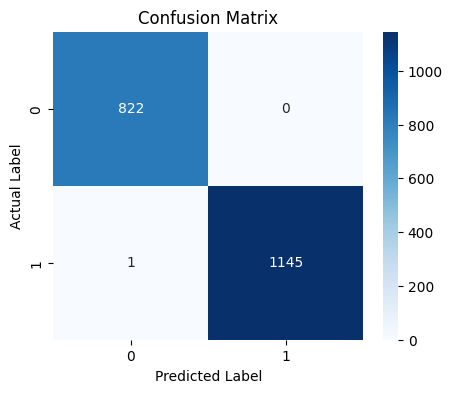

In [ ]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

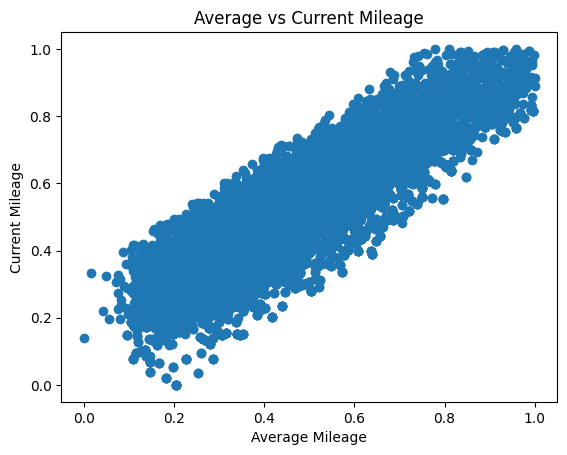

In [ ]:
plt.figure()
plt.scatter(df["average_mileage"], df["current_mileage"], alpha=1)
plt.xlabel("Average Mileage")
plt.ylabel("Current Mileage")
plt.title("Average vs Current Mileage")
plt.show()

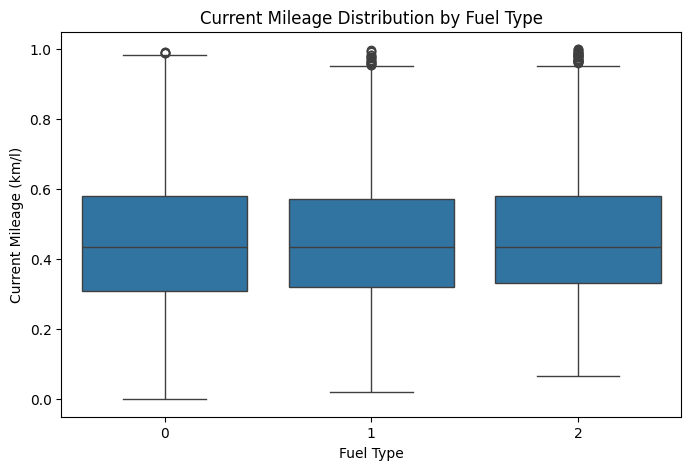

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='fuel_type', y='current_mileage', data=df)
plt.title("Current Mileage Distribution by Fuel Type")
plt.ylabel("Current Mileage (km/l)")
plt.xlabel("Fuel Type")
plt.show()

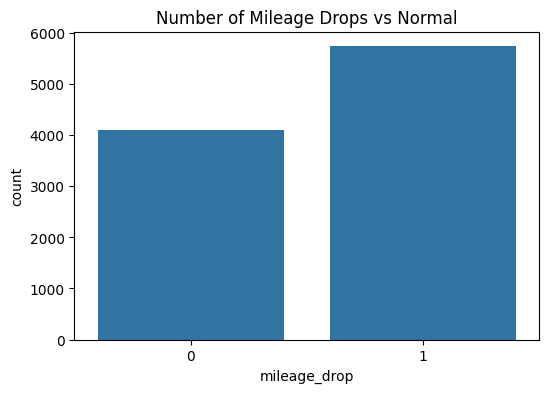

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='mileage_drop', data=df)
plt.title("Number of Mileage Drops vs Normal")
plt.show()



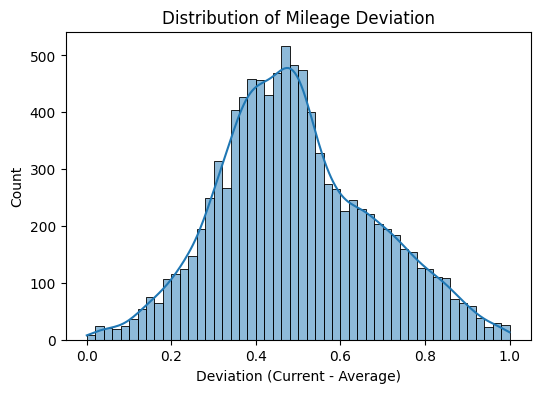

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['deviation'], bins=50, kde=True)
plt.title("Distribution of Mileage Deviation")
plt.xlabel("Deviation (Current - Average)")
plt.show()


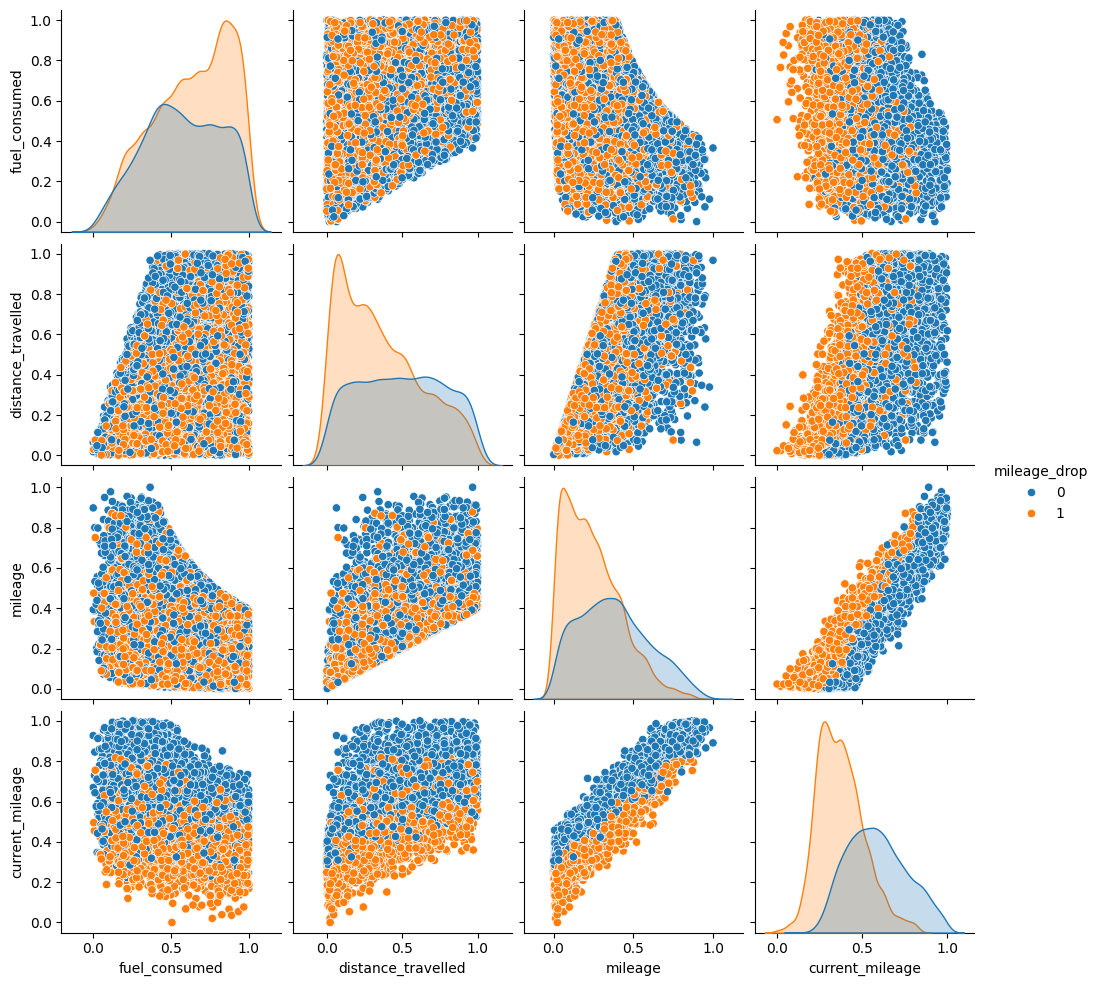

In [ ]:
sns.pairplot(df, hue='mileage_drop', vars=['fuel_consumed','distance_travelled','mileage','current_mileage'])
plt.show()

## Model Evaluation

The model was evaluated using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

These metrics help assess how well the model detects fuel spamming cases.